In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Cargar el CSV generado en el preprocesamiento
df = pd.read_csv("../data/clientes_preprocesado.csv")
df.head()

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,comunidad_autonoma
0,CLI10,0,1,1.036719,1,0.273594,0,-0.153599,0.153473,-1.036493,-0.737780,1.052557,-0.100034,1.226055,1,-0.692744,-0.853428,-0.311739
1,CLI100,1,1,0.873632,1,0.629035,0,1.468444,-0.493513,-0.873404,-0.737780,1.231266,-0.255823,0.170131,1,0.416626,1.664059,0.389373
2,CLI1000,1,1,0.927994,1,-1.148174,0,1.468444,0.153473,-0.927767,-0.737780,-0.547295,0.055288,-0.533818,0,0.732628,0.657065,-0.545443
3,CLI10000,1,0,-0.811600,0,-0.081848,1,-0.153599,0.800459,0.811856,1.182054,-0.889922,0.003358,-0.533818,0,1.653741,1.160562,-0.311739
4,CLI10001,1,1,0.221284,0,1.339919,0,1.468444,-0.493513,-0.221045,-0.737780,-0.742655,-0.118280,-0.533818,1,-0.860830,-0.853428,-0.078035


In [6]:
# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', "anno_nacimiento", "Generacion", "Family_Size",  
                'Gasto_medio_mensual_cuota', 'Dias_cliente', "comunidad_autonoma"]
X = df[numeric_cols]


from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 6


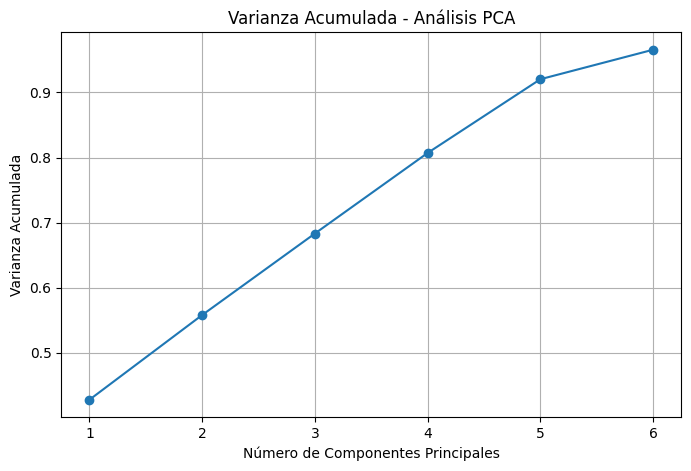

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

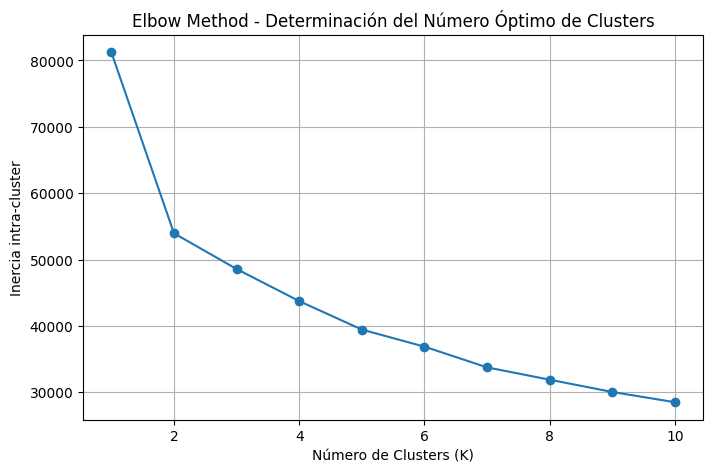

In [8]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

In [9]:
clusters = 3 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 3


In [11]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

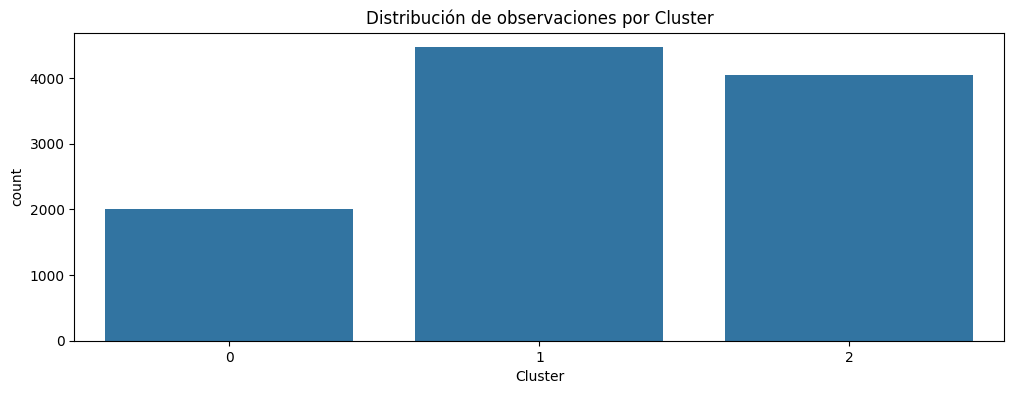

In [13]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Distribución de observaciones por Cluster')
plt.show()

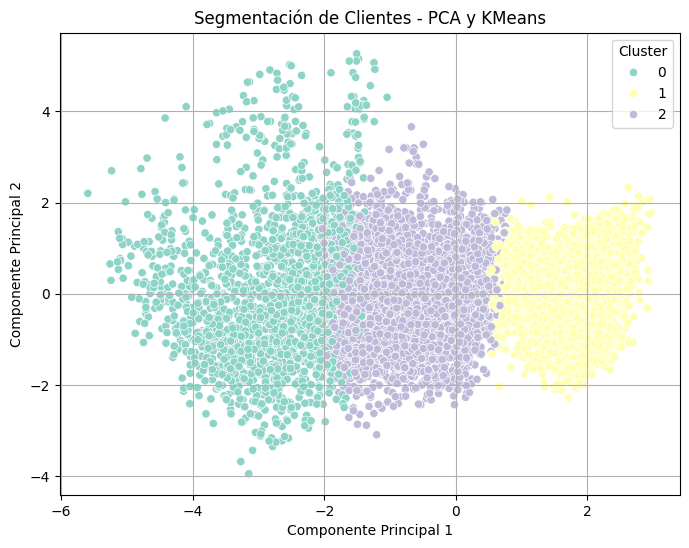

In [15]:
# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', "anno_nacimiento", "Generacion", "Family_Size",  
                'Gasto_medio_mensual_cuota', 'Dias_cliente', "comunidad_autonoma"]
X = df[numeric_cols]


from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set3')
plt.title('Segmentación de Clientes - PCA y KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(title='Cluster')
plt.show()